<a href="https://colab.research.google.com/github/yashromakarona/myCodePractice/blob/main/dl__05_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import os
os.makedirs("./data/gan_images", exist_ok=True)

In [3]:
def gan_train(epoch, batch_size, save_interval):

  (X_train, _), (_, _) = mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
  X_train = (X_train - 127.5) / 127.5

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
    discriminator.trainable = True

    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)

    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise,verbose=0)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    discriminator.trainable = False

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, true)

    if i % 100 == 0:
      print('epoch:%d'%i, 'd_loss:%.4f'%d_loss[0], 'g_loss:%.4f'%g_loss)

      if i % save_interval == 0:
        noise = np.random.normal(0, 1, (25, 100))
        gen_imgs = generator.predict(noise, verbose=0)

        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5, 5)
        count = 0
        for j in range(5):
          for k in range(5):
            axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
            axs[j, k].axis('off')
            count += 1
        fig.savefig("./data/gan_images/gan_mnist_%d.png"%i)

In [6]:
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation="relu"))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding="same"))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding="same", activation="tanh"))

In [7]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
discriminator.trainable = False

In [8]:
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
gan.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 28, 28, 1)      │       865,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,078,146 (4.11 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 225,537 (881.00 KB)

epoch:0 d_loss:0.6953 g_loss:0.6880
epoch:100 d_loss:0.2204 g_loss:0.1538
epoch:200 d_loss:0.3011 g_loss:0.4193
epoch:300 d_loss:0.4540 g_loss:0.6455
epoch:400 d_loss:0.5363 g_loss:0.7110
epoch:500 d_loss:0.5780 g_loss:0.7362
epoch:600 d_loss:0.6013 g_loss:0.7459
epoch:700 d_loss:0.6143 g_loss:0.7533
epoch:800 d_loss:0.6225 g_loss:0.7591
epoch:900 d_loss:0.6280 g_loss:0.7649
epoch:1000 d_loss:0.6323 g_loss:0.7682
epoch:1100 d_loss:0.6366 g_loss:0.7700
epoch:1200 d_loss:0.6395 g_loss:0.7719
epoch:1300 d_loss:0.6416 g_loss:0.7752
epoch:1400 d_loss:0.6430 g_loss:0.7781
epoch:1500 d_loss:0.6439 g_loss:0.7823
epoch:1600 d_loss:0.6451 g_loss:0.7853
epoch:1700 d_loss:0.6466 g_loss:0.7868
epoch:1800 d_loss:0.6481 g_loss:0.7878
epoch:1900 d_loss:0.6495 g_loss:0.7890
epoch:2000 d_loss:0.6508 g_loss:0.7896
epoch:2100 d_loss:0.6520 g_loss:0.7897
epoch:2200 d_loss:0.6533 g_loss:0.7896
epoch:2300 d_loss:0.6544 g_loss:0.7898
epoch:2400 d_loss:0.6554 g_loss:0.7898
epoch:2500 d_loss:0.6562 g_loss:0.789

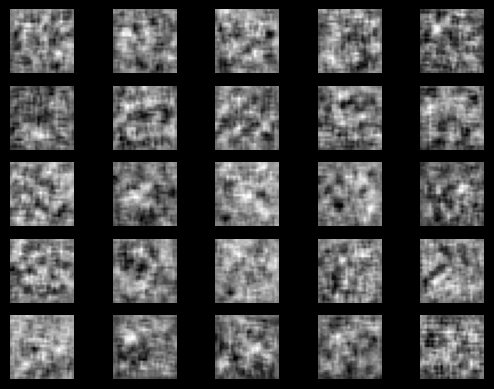

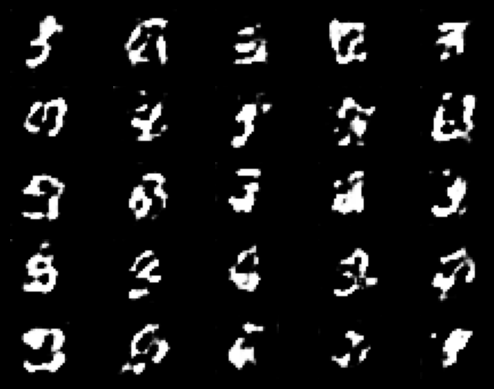

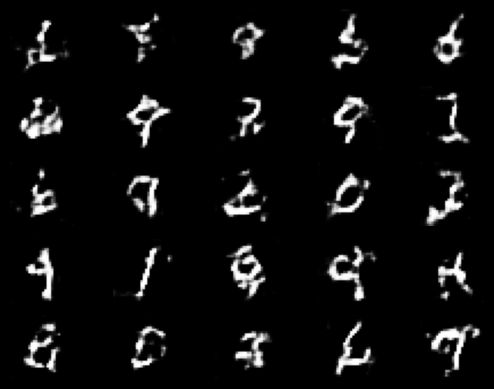

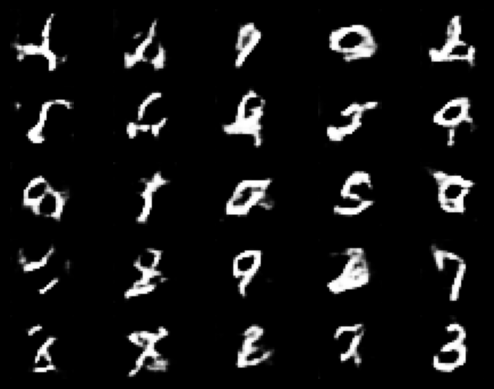

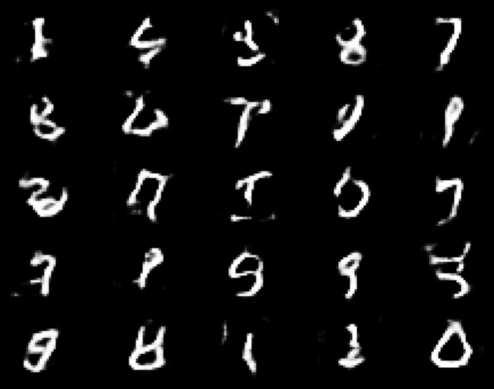

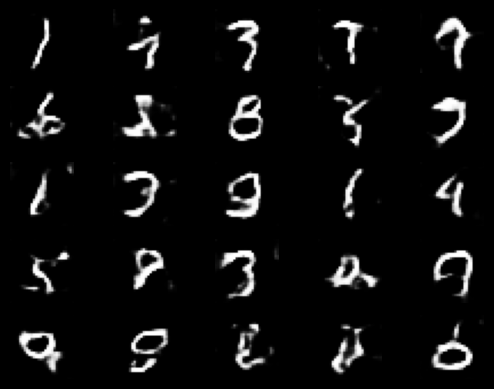

In [9]:
gan_train(4001, 32, 800)